In [1]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
matches_info_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/first-steps/matches_info_df.csv", index_col=0)
matches_info_df

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_season_shots,home_season_shots_on_target,referee,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty
0,1,6,Manchester United,1.57,3.90,7.50,Leicester City,9,0.00,0.00,...,235,145,Andre Marriner,2,0,1,0,11,8,0
1,-1,13,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,4,0.00,0.00,...,213,98,Martin Atkinson,2,0,2,0,11,12,1
2,2,14,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,18,0.00,0.00,...,191,100,Kevin Friend,1,0,1,0,11,9,0
3,-2,19,Fulham,2.50,3.40,3.00,Crystal Palace,12,0.00,0.00,...,223,101,Mike Dean,1,0,2,0,9,11,0
4,-3,20,Huddersfield Town,6.50,4.00,1.61,Chelsea,3,0.00,0.00,...,169,77,Chris Kavanagh,2,0,1,0,9,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,7,2.78,1.28,...,267,145,Martin Atkinson,0,0,2,0,3,11,0
376,-2,6,Manchester United,1.28,6.50,11.00,Cardiff City,18,2.00,0.61,...,235,145,Jonathan Moss,3,0,3,0,9,6,0
377,0,16,Southampton,1.44,4.75,8.50,Huddersfield Town,20,1.22,0.33,...,207,108,Lee Probert,0,0,1,0,8,6,0
378,0,4,Tottenham Hotspur,2.20,3.50,3.50,Everton,8,2.06,1.06,...,236,124,Andre Marriner,0,0,2,0,10,13,0


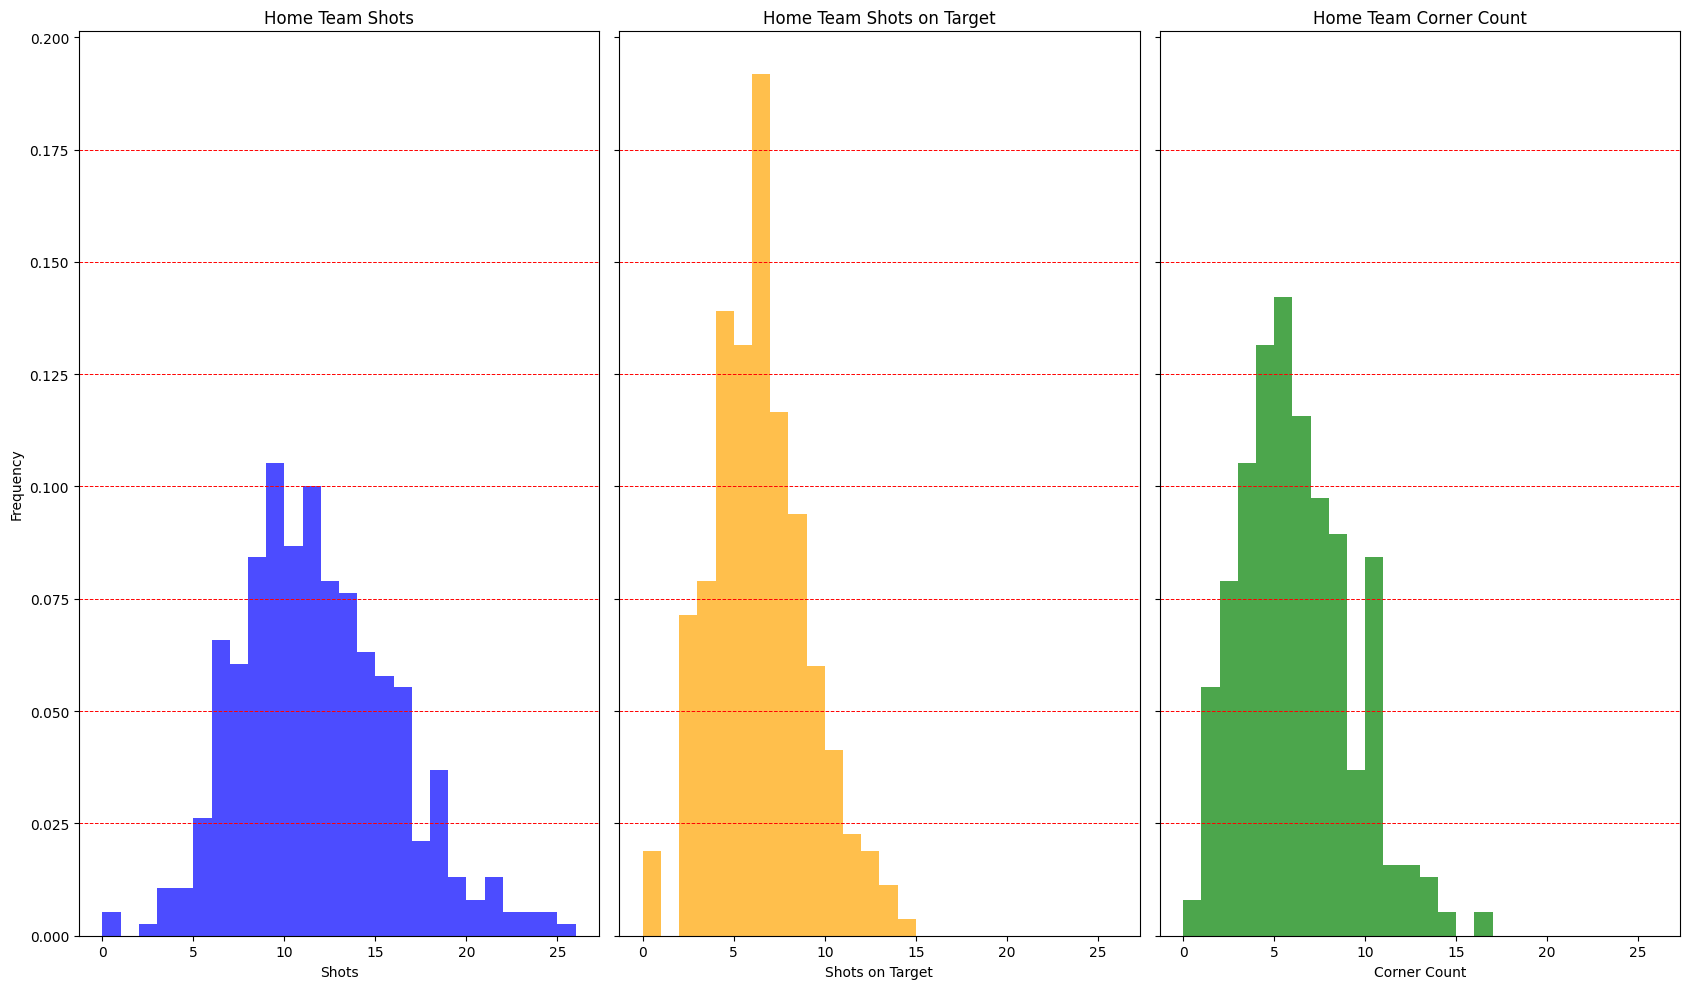

In [2]:
# Extração dos dados relevantes
general_shots = matches_info_df['home_team_shots']
shots_on_target = matches_info_df['home_team_shots_on_target_dirty']
home_team_corner_count = matches_info_df['home_team_corner_count']

# Criação dos plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(17, 10))

# Plot do histograma de general_shots
ax1.hist(general_shots, bins=int(general_shots.max()), color='blue', alpha=0.7, density=True)
ax1.set_title('Home Team Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Frequency')

# Adição das linhas tracejadas verdes
for y in [0.025, 0.050, 0.075, 0.1, 0.125, 0.15, 0.175]:
    ax1.axhline(y=y, color='red', linestyle='--', linewidth=0.7)
    ax2.axhline(y=y, color='red', linestyle='--', linewidth=0.7)
    ax3.axhline(y=y, color='red', linestyle='--', linewidth=0.7)

# Plot do histograma de shots_on_target
ax2.hist(shots_on_target, bins=int(shots_on_target.max()), color='orange', alpha=0.7, density=True)
ax2.set_title('Home Team Shots on Target')
ax2.set_xlabel('Shots on Target')

# Plot do histograma de home_team_corner_count
ax3.hist(home_team_corner_count, bins=int(home_team_corner_count.max()), color='green', alpha=0.7, density=True)
ax3.set_title('Home Team Corner Count')
ax3.set_xlabel('Corner Count')

# Ajuste do layout
plt.tight_layout()
plt.show()


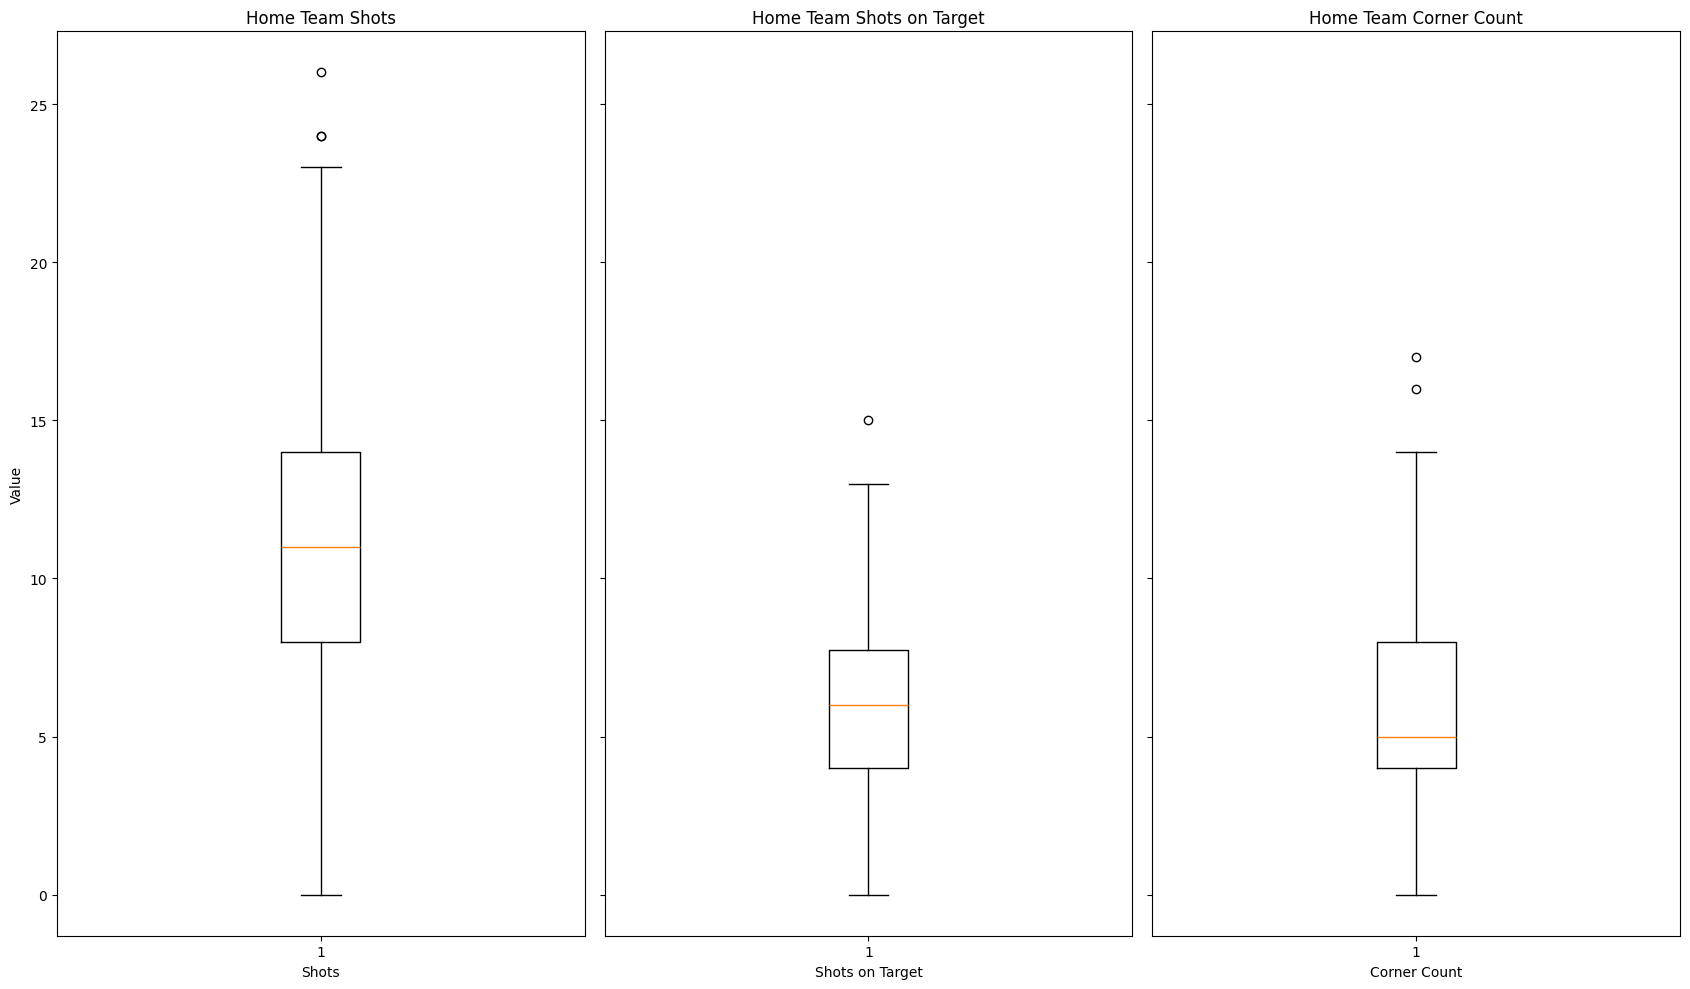

In [3]:
import matplotlib.pyplot as plt

# Extração dos dados relevantes
general_shots = matches_info_df['home_team_shots']
shots_on_target = matches_info_df['home_team_shots_on_target_dirty'].dropna()
home_team_corner_count = matches_info_df['home_team_corner_count']

# Criação dos plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(17, 10))

# Plot do boxplot de general_shots
ax1.boxplot(general_shots, vert=True)
ax1.set_title('Home Team Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Value')

# Plot do boxplot de shots_on_target
ax2.boxplot(shots_on_target, vert=True)
ax2.set_title('Home Team Shots on Target')
ax2.set_xlabel('Shots on Target')

# Plot do boxplot de home_team_corner_count
ax3.boxplot(home_team_corner_count, vert=True, meanline=True)
ax3.set_title('Home Team Corner Count')
ax3.set_xlabel('Corner Count')

# Ajuste do layout
plt.tight_layout()
plt.show()


investigando melhor podemos observar que esses outliers podem estao distorcendo os testes estatisticos de normalidade, além de não serem representativos da população 

In [4]:
# vamos remover outliers pelo metodo de tukey
q1 = general_shots.quantile(q=0.25)
q3 = general_shots.quantile(q=0.75)
iqr = q3 - q1
print(iqr)

6.0


In [5]:
matches_info_df[general_shots < (q1-1.5*iqr)]
# nao tem outliers para baixo

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_season_shots,home_season_shots_on_target,referee,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty


In [6]:
df = matches_info_df[general_shots > (q3+1.5*iqr)]
df[['result','home_team_name', 'B365H', 'B365D', 'B365A', 'away_team_name','home_team_shots']]

,result,home_team_name,B365H,B365D,B365A,away_team_name,home_team_shots
17,5,Manchester City,1.10,13.0,26.00,Huddersfield Town,24
265,2,Newcastle United,1.83,3.5,5.25,Huddersfield Town,24
318,2,Manchester City,1.06,17.0,34.00,Cardiff City,26


In [7]:
# dropando outliers
filtered_df = matches_info_df[(matches_info_df['home_team_shots'] >= (q1 - 1.5 * iqr)) & (matches_info_df['home_team_shots'] <= (q3 + 1.5 * iqr))]
filtered_df

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_season_shots,home_season_shots_on_target,referee,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty
0,1,6,Manchester United,1.57,3.90,7.50,Leicester City,9,0.00,0.00,...,235,145,Andre Marriner,2,0,1,0,11,8,0
1,-1,13,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,4,0.00,0.00,...,213,98,Martin Atkinson,2,0,2,0,11,12,1
2,2,14,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,18,0.00,0.00,...,191,100,Kevin Friend,1,0,1,0,11,9,0
3,-2,19,Fulham,2.50,3.40,3.00,Crystal Palace,12,0.00,0.00,...,223,101,Mike Dean,1,0,2,0,9,11,0
4,-3,20,Huddersfield Town,6.50,4.00,1.61,Chelsea,3,0.00,0.00,...,169,77,Chris Kavanagh,2,0,1,0,9,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,7,2.78,1.28,...,267,145,Martin Atkinson,0,0,2,0,3,11,0
376,-2,6,Manchester United,1.28,6.50,11.00,Cardiff City,18,2.00,0.61,...,235,145,Jonathan Moss,3,0,3,0,9,6,0
377,0,16,Southampton,1.44,4.75,8.50,Huddersfield Town,20,1.22,0.33,...,207,108,Lee Probert,0,0,1,0,8,6,0
378,0,4,Tottenham Hotspur,2.20,3.50,3.50,Everton,8,2.06,1.06,...,236,124,Andre Marriner,0,0,2,0,10,13,0


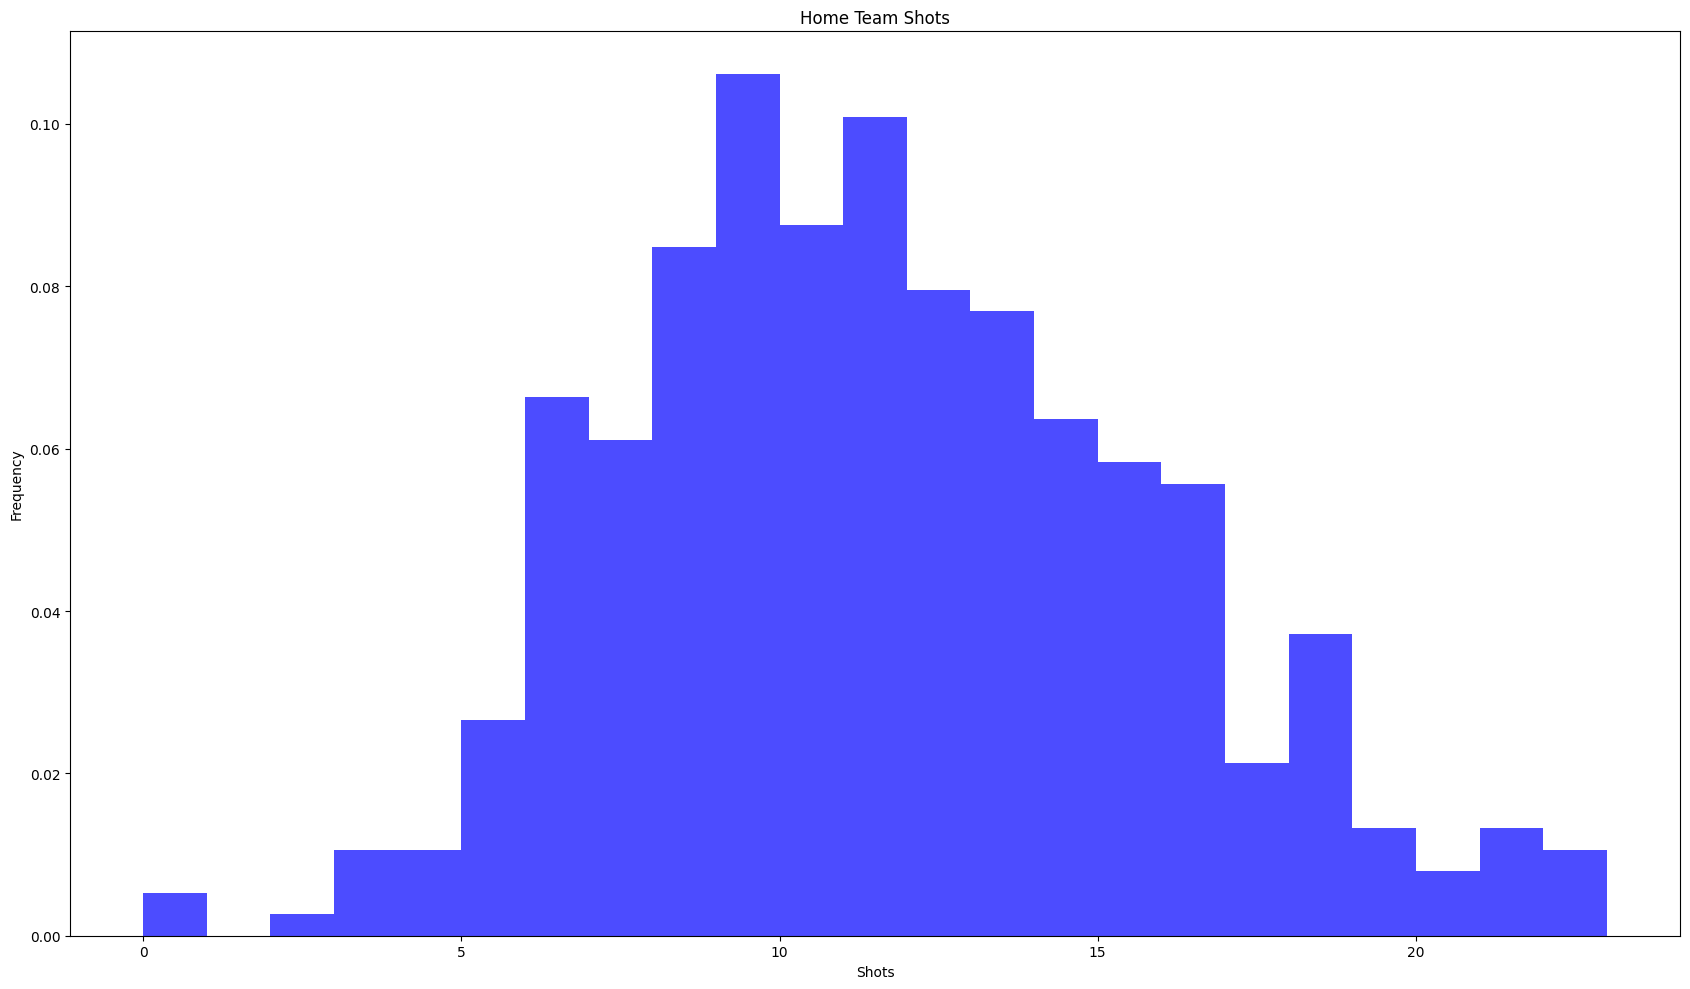

ShapiroResult(statistic=0.9855527620355298, pvalue=0.0008154104564106114)


In [8]:
# Extração dos dados relevantes
filtered_general_shots = filtered_df['home_team_shots']

# Criação dos plots
fig, (ax1) = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(17, 10))

# Plot do histograma de general_shots
ax1.hist(filtered_general_shots, bins=int(filtered_general_shots.max()), color='blue', alpha=0.7, density=True)
ax1.set_title('Home Team Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Frequency')

# Ajuste do layout
plt.tight_layout()
plt.show()
print(stats.shapiro(filtered_general_shots))

<Axes: xlabel='B365A', ylabel='home_team_shots'>

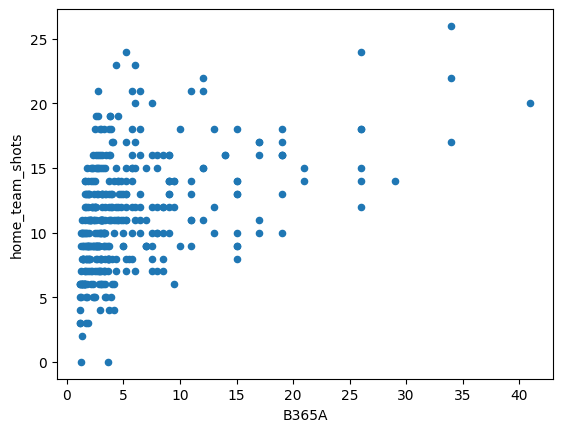

In [9]:
matches_info_df.plot.scatter(x='B365A',y='home_team_shots')
# fica evidente que preciso descretizar

In [10]:
# dropando outliers


((array([-2.90737002, -2.61791956, -2.45458139, -2.33846807, -2.24729645,
         -2.17168812, -2.10677252, -2.04968264, -1.99858276, -1.95222393,
         -1.90971645, -1.87040326, -1.83378479, -1.79947197, -1.76715567,
         -1.73658602, -1.70755806, -1.67990149, -1.65347323, -1.62815182,
         -1.60383329, -1.58042787, -1.55785755, -1.53605404, -1.51495723,
         -1.49451394, -1.47467683, -1.45540361, -1.43665635, -1.41840084,
         -1.40060616, -1.38324425, -1.36628957, -1.3497188 , -1.33351057,
         -1.31764529, -1.30210492, -1.28687279, -1.27193353, -1.25727287,
         -1.24287757, -1.22873532, -1.21483464, -1.20116482, -1.18771584,
         -1.17447833, -1.16144348, -1.14860304, -1.13594924, -1.12347475,
         -1.11117269, -1.09903653, -1.08706012, -1.07523764, -1.06356357,
         -1.05203267, -1.04063998, -1.02938078, -1.01825059, -1.00724513,
         -0.99636033, -0.98559232, -0.9749374 , -0.96439202, -0.95395281,
         -0.94361654, -0.93338012, -0.

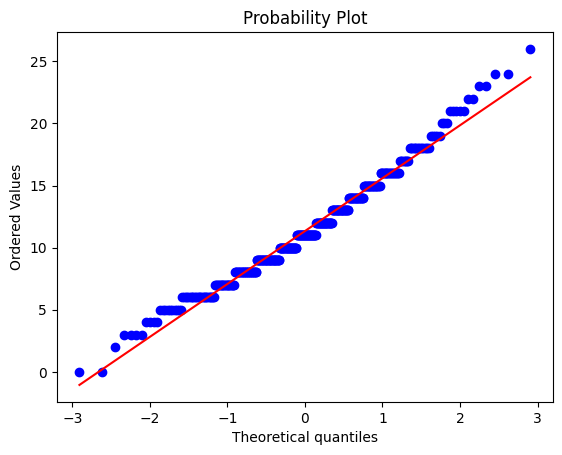

In [11]:
stats.probplot(general_shots, plot= plt)

In [12]:
#hapiro-Wilk test de normalidade (valor,p-value)
stats.shapiro(general_shots)

ShapiroResult(statistic=0.9815592094611519, pvalue=8.924226728424973e-05)

looks like a gaussian distribution

H0 the variables follows a normal distribution

H1 the variables Does not follow a normal distribution

In [ ]:
# Extração dos dados relevantes
general_shots = matches_info_df['home_team_shots']
shots_on_target = matches_info_df['home_team_shots_on_target_dirty']
home_team_corner_count = matches_info_df['home_team_corner_count']

# Criação dos plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(17, 10))

# Plot do histograma de general_shots
ax1.hist(general_shots, bins=int(general_shots.max()), color='blue', alpha=0.7)
ax1.set_title('Home Team Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Frequency')

# Teste de normalidade de Shapiro-Wilk
stat, p = stats.shapiro(general_shots, axis=int)
ax1.text(0.05, 0.95, f'Stat: {stat:.3f}\np-value: {p:.3f}', transform=ax1.transAxes)

# Plot do histograma de shots_on_target
ax2.hist(shots_on_target, bins=int(shots_on_target.max()), color='orange', alpha=0.7)
ax2.set_title('Home Team Shots on Target')
ax2.set_xlabel('Shots on Target')

# Teste de normalidade de Shapiro-Wilk
stat, p = stats.shapiro(shots_on_target, nan_policy='omit')
ax2.text(0.05, 0.95, f'Stat: {stat:.3f}\np-value: {p:.3f}', transform=ax2.transAxes)


# Plot do histograma de home_team_corner_count
ax3.hist(home_team_corner_count, bins=int(home_team_corner_count.max()), color='green', alpha=0.7)
ax3.set_title('Home Team Corner Count')
ax3.set_xlabel('Corner Count')

# Teste de normalidade de Shapiro-Wilk
stat, p = stats.shapiro(home_team_corner_count, axis=int)
ax3.text(0.05, 0.95, f'Stat: {stat:.3f}\np-value: {p:.3f}', transform=ax3.transAxes)

# Adição das linhas tracejadas verdes
for y in [40, 30, 20, 10]:
    ax1.axhline(y=y, color='red', linestyle='--', linewidth=0.7)
    ax2.axhline(y=y, color='red', linestyle='--', linewidth=0.7)
    ax3.axhline(y=y, color='red', linestyle='--', linewidth=0.7)

# Ajuste do layout
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro

# home_team_corner_count é o seu conjunto de dados
statistic, p_value = shapiro(home_team_corner_count)

# Imprimir os resultados
print("Estatística do teste:", statistic)
print("Valor-p:", p_value)

# Definir um nível de significância
alpha = 0.05

# Verificar se os dados seguem uma distribuição normal
if p_value > alpha:
    print("Não rejeitar H0: Os dados parecem seguir uma distribuição normal.")
else:
    print("Rejeitar H0: Os dados não seguem uma distribuição normal.")
    
home_team_corner_count

Estatística do teste: 0.9655566231080712
Valor-p: 8.443535957510466e-08
Rejeitar H0: Os dados não seguem uma distribuição normal.


0       2
1       3
2       7
3       5
4       2
       ..
375     4
376    11
377     4
378     7
379     7
Name: home_team_corner_count, Length: 380, dtype: int64

In [ ]:
from scipy.stats import shapiro

# home_team_corner_count é o seu conjunto de dados
statistic, p_value = shapiro(matches_info_df[['away_performance_rank']])

# Imprimir os resultados
print("Estatística do teste:", statistic)
print("Valor-p:", p_value)

# Definir um nível de significância
alpha = 0.05

# Verificar se os dados seguem uma distribuição normal
if p_value > alpha:
    print("Não rejeitar H0: Os dados parecem seguir uma distribuição normal.")
else:
    print("Rejeitar H0: Os dados não seguem uma distribuição normal.")

Estatística do teste: 0.949127707143748
Valor-p: 3.718979152003433e-10
Rejeitar H0: Os dados não seguem uma distribuição normal.


Text(0, 0.5, 'Frequency')

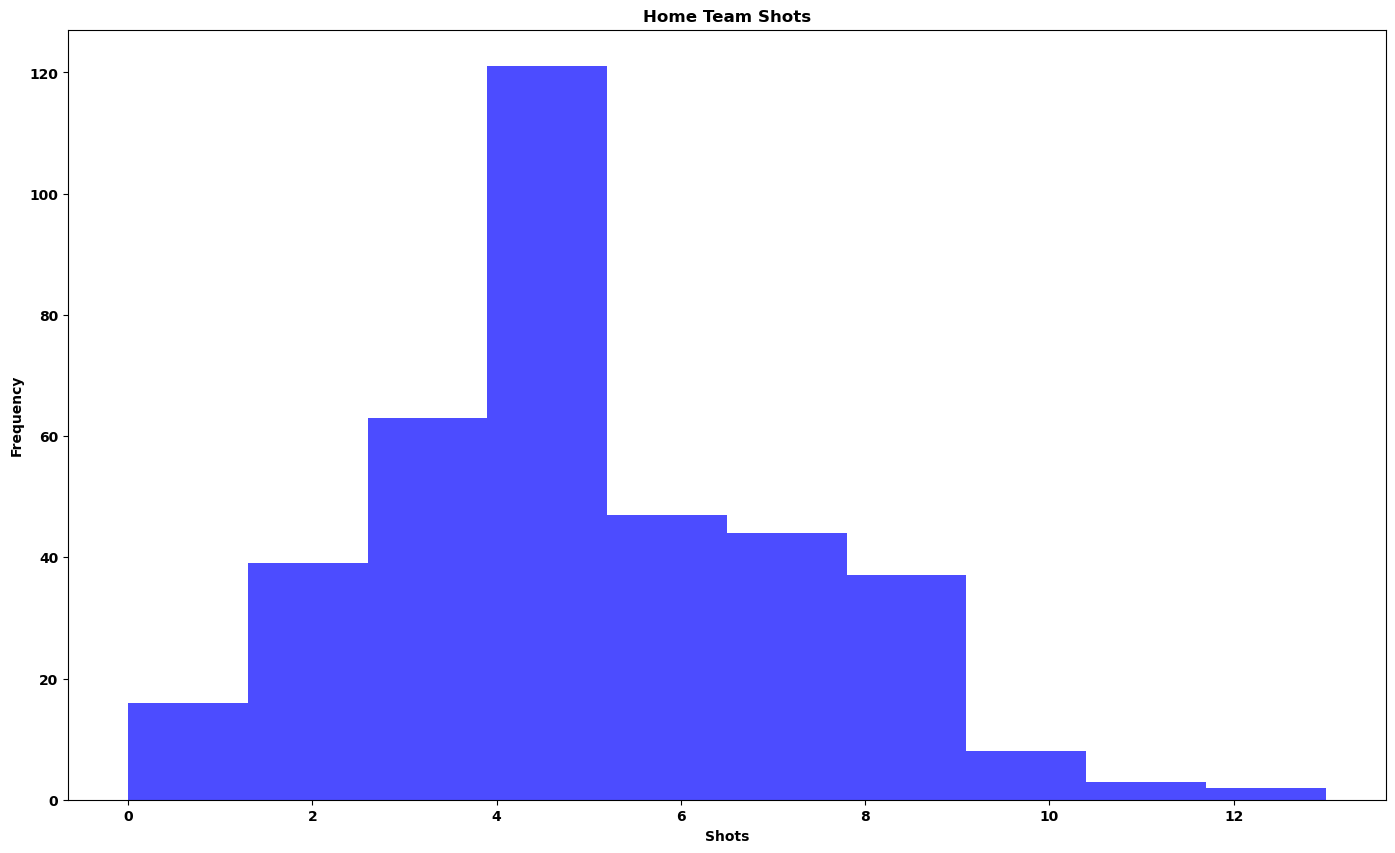

In [ ]:
# Extração dos dados relevantes
home_team_corner_count = matches_info_df['away_team_shots_on_target']

# Criação dos plots
fig, (ax1) = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(17, 10))

# Plot do histograma de general_shots
ax1.hist(home_team_corner_count, color='blue', alpha=0.7)
ax1.set_title('Home Team Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Frequency')

Teste de Hipótese sobre a Relação entre Chutes e Chutes no Gol

Hipótese Nula (H0): Não há relação linear significativa entre o número de chutes e chutes no gol.

Hipótese Alternativa (H1): Existe uma relação linear significativa entre o número de chutes e chutes no gol.

In [ ]:
from scipy.stats import linregress

linregress(matches_info_df['away_team_shots'], matches_info_df['away_team_shots_on_target'])


LinregressResult(slope=0.5284457806228574, intercept=0.026531570323982123, rvalue=0.7441706323373105, pvalue=3.1860950385869014e-68, stderr=0.02439785753740875, intercept_stderr=0.23871149506269604)

Teste de Hipótese sobre a Média de Chutes entre Times Vencedores e Perdedor

Hipótese Nula (H0): A média de chutes dos times vencedores é igual à dos times perdedores.

Hipótese Alternativa (H1): A média de chutes dos times vencedores é diferente da dos times perdedores.

In [ ]:
from scipy.stats import ttest_ind

winners = matches_info_df[matches_info_df['result'] > 0]['home_team_shots']
losers = matches_info_df[matches_info_df['result'] < 0]['home_team_shots']
t_stat, p_value = ttest_ind(winners, losers)
print(f'P-valor: {p_value}')

P-valor: 5.016324959946031e-11


Teste de Hipótese sobre a Probabilidade de Vitória Pre-jogo

Hipótese Nula (H0): A probabilidade de vitória pré-jogo não influencia significativamente o resultado da partida.

Hipótese Alternativa (H1): A probabilidade de vitória pré-jogo influencia significativamente o resultado da partida.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convertendo resultados para valores binários
matches_info_df['result_binary'] = matches_info_df['result'].apply(lambda x: 1 if x > 0 else 0)

# Features e target
X = matches_info_df[['B365A']]
y = matches_info_df['result_binary']

# Divisão de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')

Acurácia do modelo: 0.6754385964912281


e os times que eram favoritos realmente ganharam e se o favoritismo influenciou no quao essa vitoria foi larga, como eu poderia montar um grafico para verificar isso


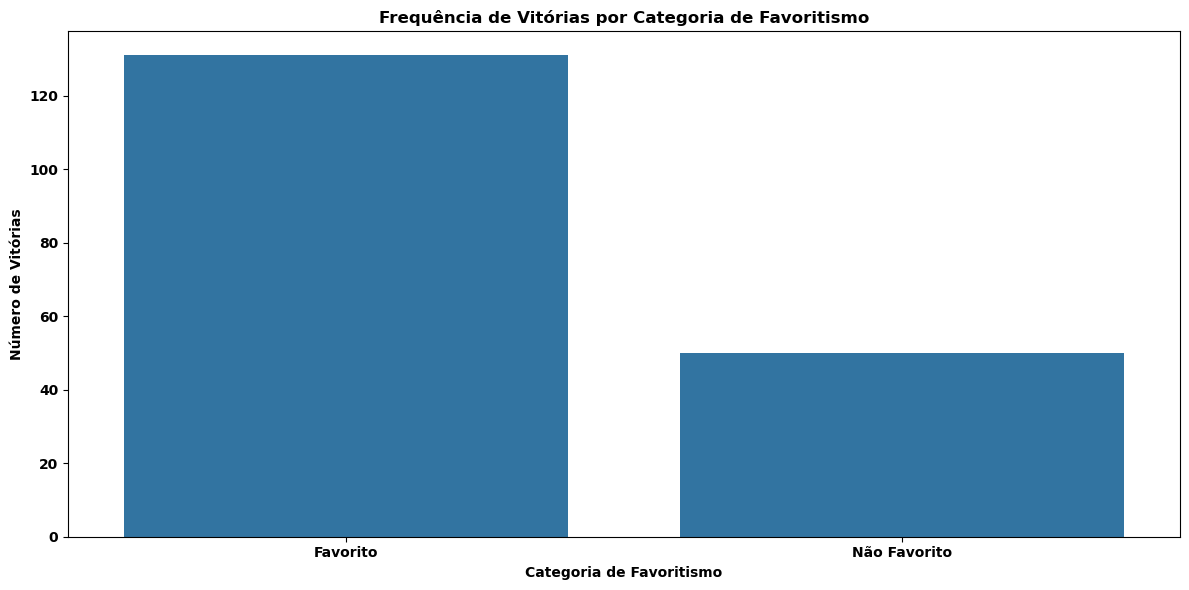

In [ ]:
# talvez fiz besteira aqui nao sei

# Definir as categorias de favoritismo com base nos valores da odd da bet do time de fora
def categorize_favoritism(odd):
    if odd <= 3:
        return 'Não Favorito'
    else:
        return 'Favorito'

# Criar uma nova coluna 'favoritism' com as categorias de favoritismo
matches_info_df['favoritism'] = matches_info_df['B365A'].apply(categorize_favoritism)

# Calcular a frequência de vitórias para cada categoria de favoritismo
favoritism_win_freq = matches_info_df.groupby('favoritism')['result'].apply(lambda x: (x > 0).sum())

# Calcular a média da margem de vitória para cada categoria de favoritismo
favoritism_avg_margin = matches_info_df.groupby('favoritism')['result'].mean()

# Criar um subplot com duas barras lado a lado
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plotar a frequência de vitórias para cada categoria de favoritismo
sns.barplot(x=favoritism_win_freq.index, y=favoritism_win_freq.values, ax=ax)
ax.set_title('Frequência de Vitórias por Categoria de Favoritismo')
ax.set_xlabel('Categoria de Favoritismo')
ax.set_ylabel('Número de Vitórias')

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


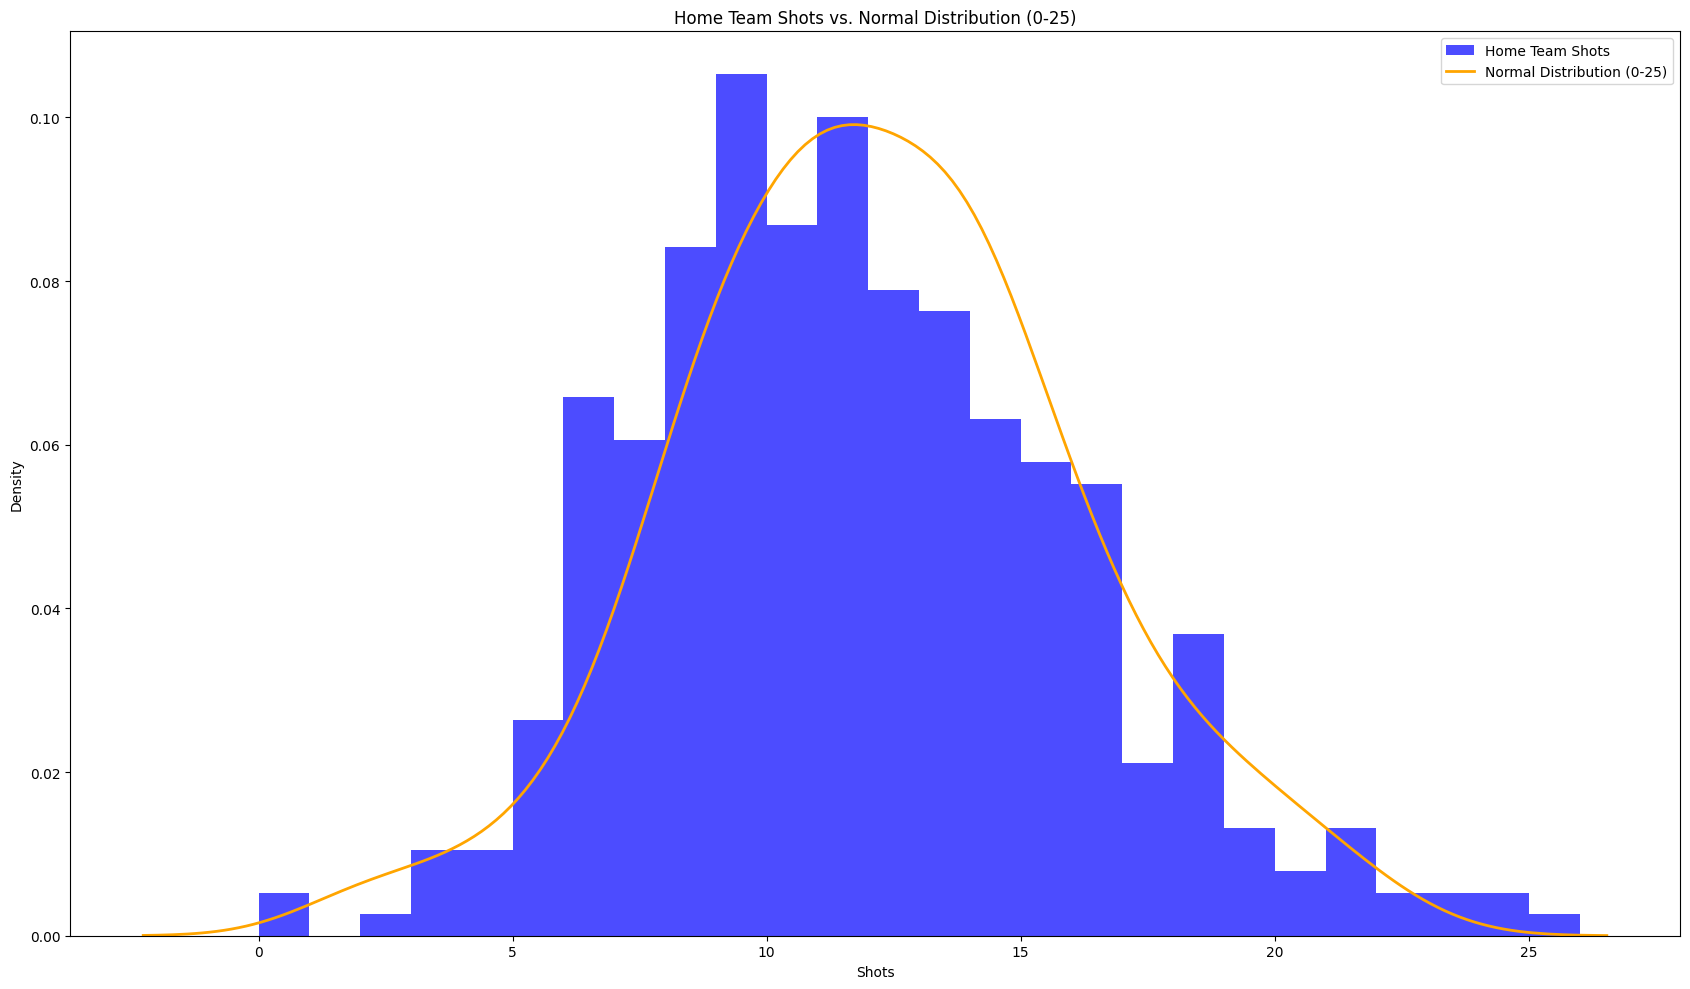

In [15]:
# Extração dos dados relevantes
general_shots = matches_info_df['home_team_shots']

# Definir parâmetros da distribuição normal
mean = 12.5
std_dev = 4
num_samples = 190

# Gerar dados normais
data = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

# Filtrar para manter dados dentro do intervalo [0, 25]
data = data[(data >= 0) & (data <= 25)]

# Criação dos plots
fig, ax1 = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(17, 10))

# Plot do histograma de general_shots com densidade normalizada
ax1.hist(general_shots, bins=int(general_shots.max()), color='blue', alpha=0.7, label='Home Team Shots', density=True)

# Plot da linha de densidade dos dados normais
sns.kdeplot(data, ax=ax1, color='orange', label='Normal Distribution (0-25)', linewidth=2)

# Configuração do título e dos rótulos dos eixos
ax1.set_title('Home Team Shots vs. Normal Distribution (0-25)')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Density')

# Exibir a legenda
ax1.legend()

# Ajuste do layout
plt.tight_layout()
plt.show()


In [ ]:
stats.shapiro(general_shots)

In [ ]:
stats.anderson(general_shots)